<a href="https://colab.research.google.com/github/Leejoowon123/OSS/blob/main/oss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

In [309]:
# 데이터 로드
data = pd.read_csv('/content/sample_data/california_housing_train.csv')

# 데이터 분포 확인

In [310]:
# 데이터 정보 확인
print(data.info())
print(data.describe())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     

In [311]:
print('Longitude min: ',data['longitude'].min())
print('Population average: ',data['population'].mean())
print('Income max: ',data['median_income'].max())
print('Income min: ',data['median_income'].min())
print('Median_house_value max: ',data['median_house_value'].max())
print('Median_house_value min: ',data['median_house_value'].min())
print('Median_house_value average: ',data['median_house_value'].mean())

Longitude min:  -124.35
Population average:  1429.5739411764705
Income max:  15.0001
Income min:  0.4999
Median_house_value max:  500001.0
Median_house_value min:  14999.0
Median_house_value average:  207300.91235294117


In [312]:
# 결측치 확인
print(data.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


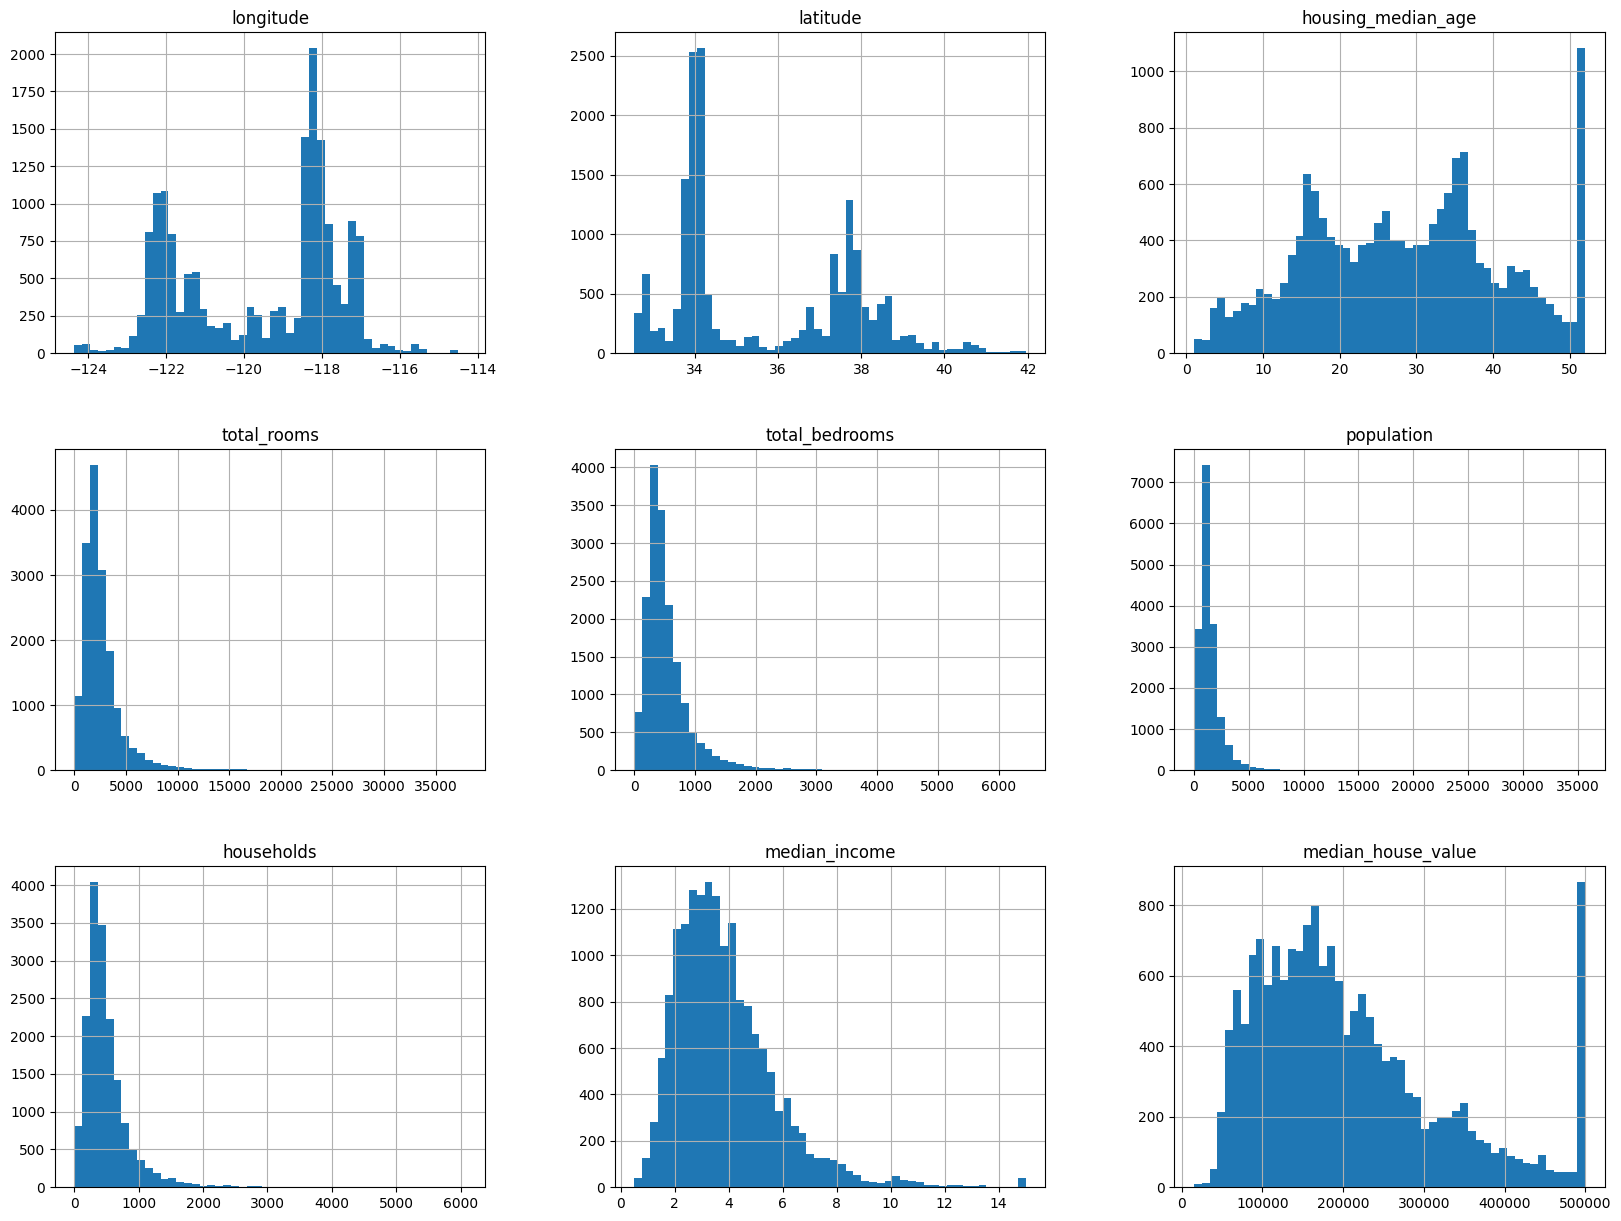

In [313]:
data.hist(bins=50, figsize=(20,15))
plt.show()

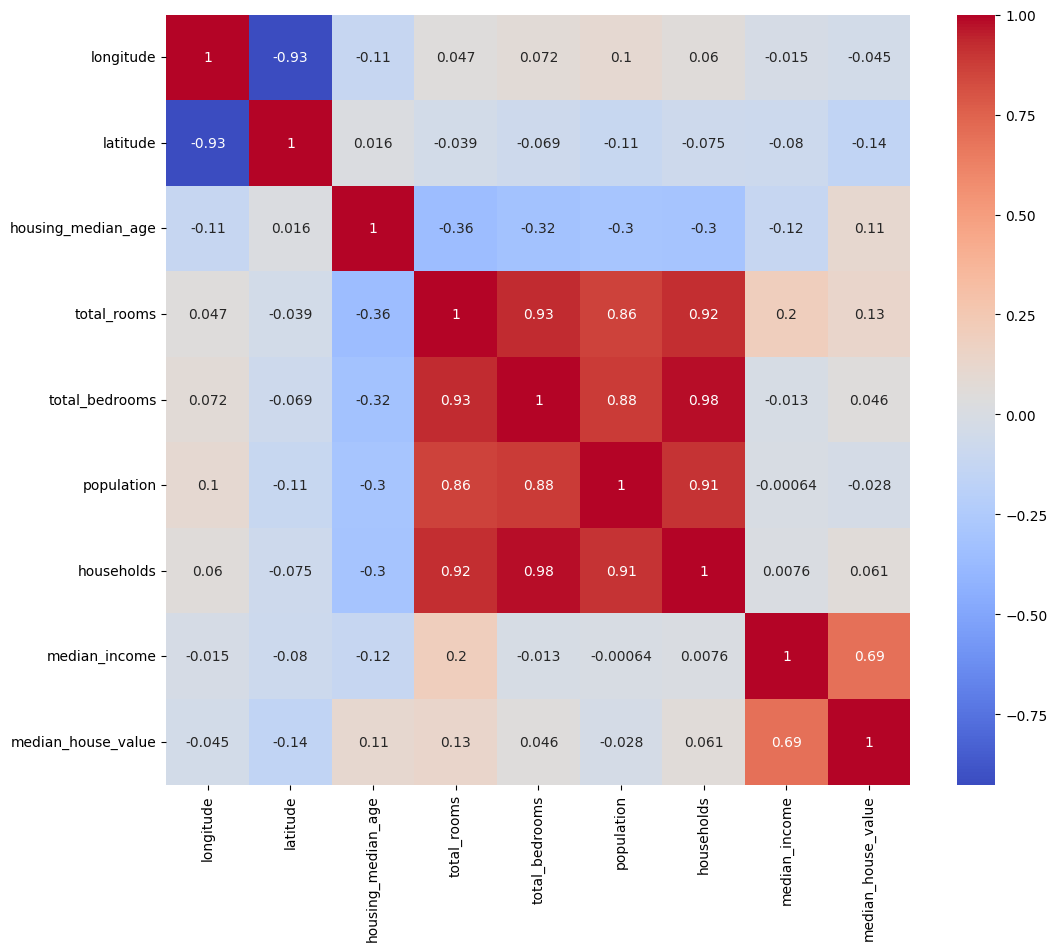

In [314]:
# 상관관계 분석
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# 데이터 정규화

In [315]:
# 수치형 특성 정규화 (MinMaxScaler 사용)
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                      'total_bedrooms', 'population', 'households', 'median_income',
                      'median_house_value']
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

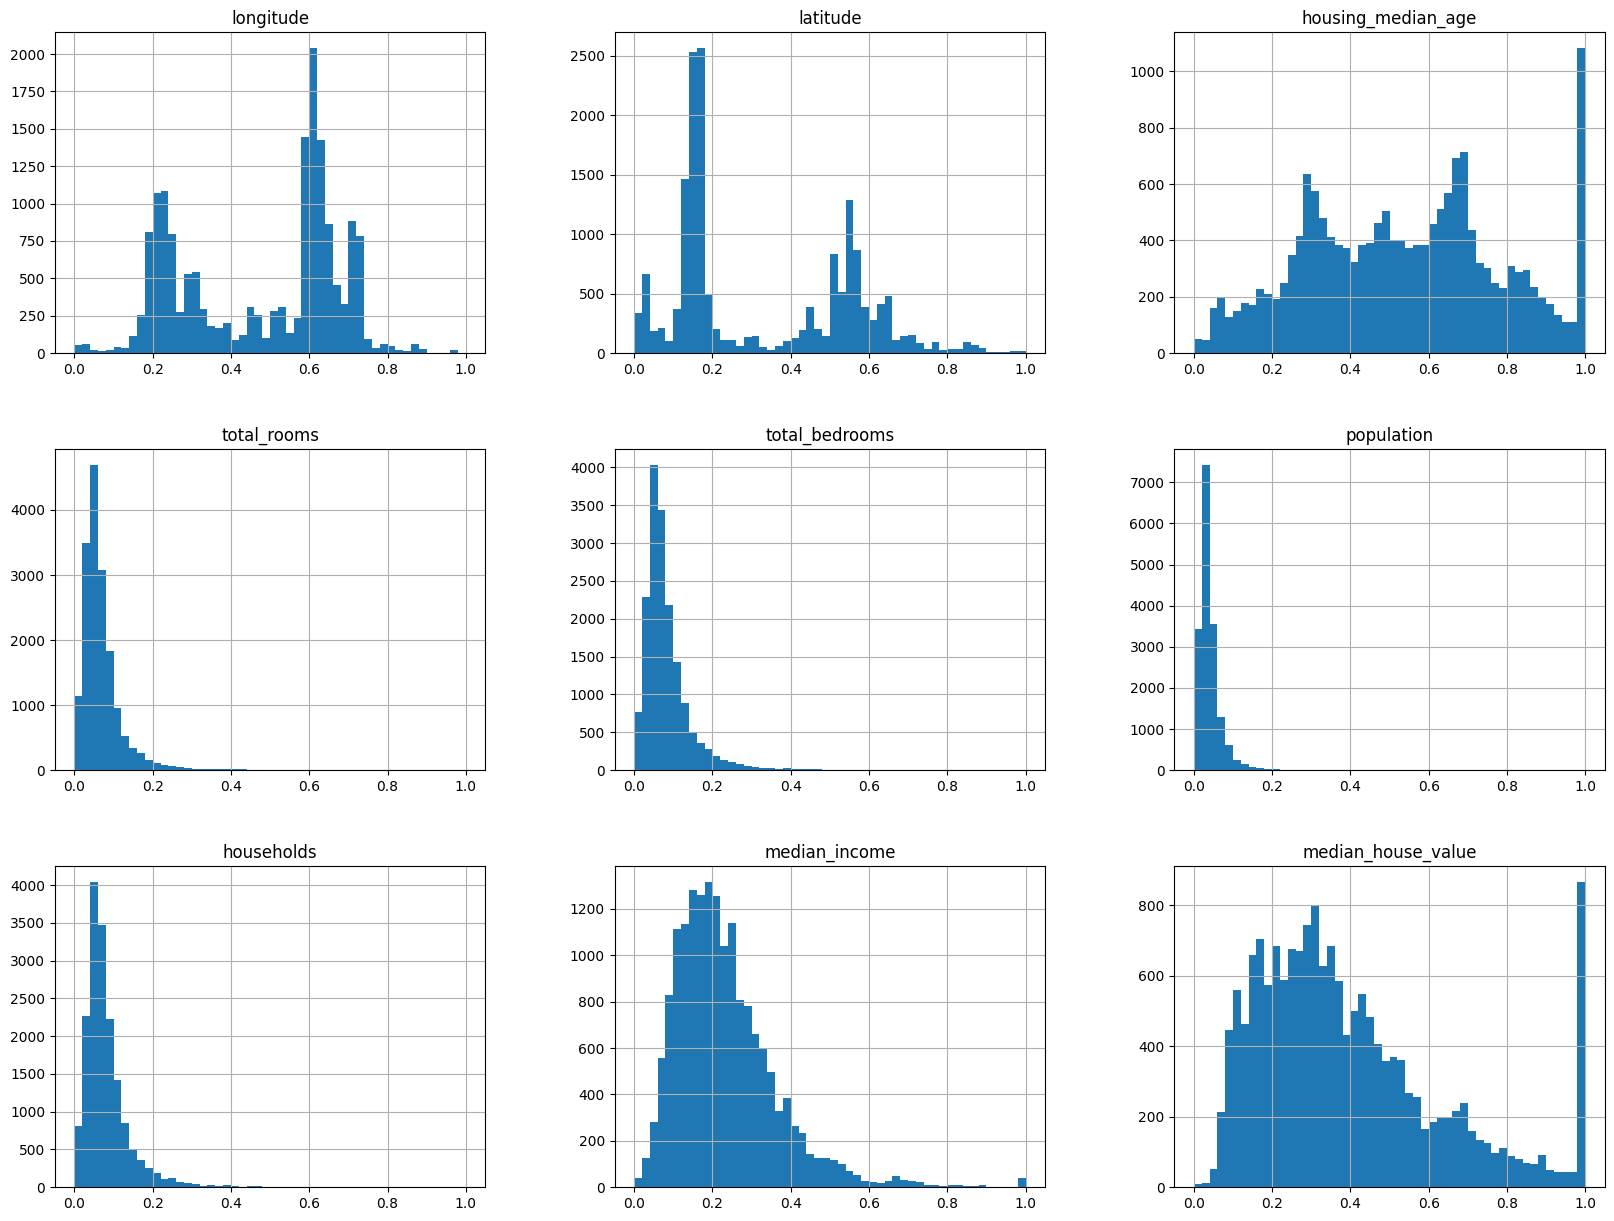

In [316]:
# 정규화 후 데이터 분포 재확인
data.hist(bins=50, figsize=(20,15))
plt.show()

## 결측치 처리

In [318]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[np.isfinite(df[column])]
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [319]:
for col in numerical_features:
  data = remove_outliers(data, col)

# 모델 학습

In [320]:
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 선형 회귀

In [321]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

## Decision Tree

In [322]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_pred)
tree_r2 = r2_score(y_test, tree_pred)

## Random Forest 모델

In [323]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

## 다항 회귀 모델

In [324]:
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
poly_pred = poly_model.predict(X_test)
poly_mse = mean_squared_error(y_test, poly_pred)
poly_r2 = r2_score(y_test, poly_pred)

# 성능 비교

In [325]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Polynomial Regression'],
    'MSE': [linear_mse, tree_mse, rf_mse, poly_mse],
    'R^2': [linear_r2, tree_r2, rf_r2, poly_r2]
})

In [326]:
results = results.sort_values(by='R^2', ascending=False) #R^2 기준으로 정렬
print(results.to_string(index=False))

                Model      MSE      R^2
        Random Forest 0.007639 0.779085
Polynomial Regression 0.011490 0.667719
    Linear Regression 0.013284 0.615815
        Decision Tree 0.014820 0.571392


# 시각화 (R^2 값, 실제값VS예측값)


<ipython-input-327-2d3c032c4d40>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R^2', data=results, palette='viridis')


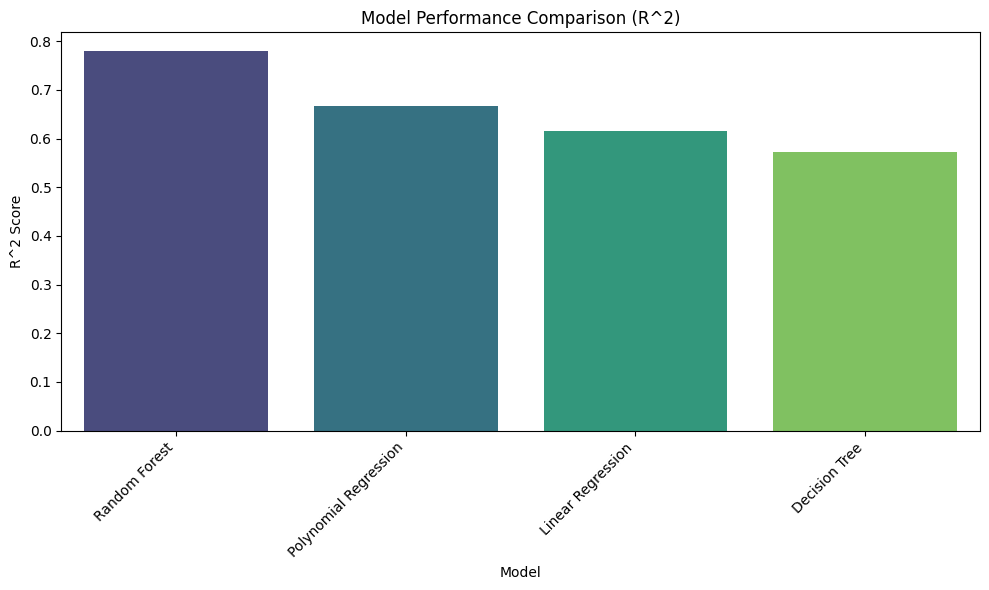

In [327]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R^2', data=results, palette='viridis')
plt.title('Model Performance Comparison (R^2)')
plt.xlabel('Model')
plt.ylabel('R^2 Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 잔차분석

In [328]:
def residual_analysis(model, y_test, y_pred, model_name):
    residuals = y_test - y_pred

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Actual vs Predicted Plot
    ax1.scatter(y_test, y_pred, alpha=0.5)
    ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)  # Added a diagonal line for reference
    ax1.set_xlabel('Actual House Prices')
    ax1.set_ylabel('Predicted House Prices')
    ax1.set_title(f'Actual vs Predicted House Prices ({model_name})')

    # Residual Histogram
    ax2.hist(residuals, bins=30)
    ax2.set_xlabel('Residuals')
    ax2.set_ylabel('Frequency')
    ax2.set_title(f'Residual Histogram ({model_name})')

    plt.show()

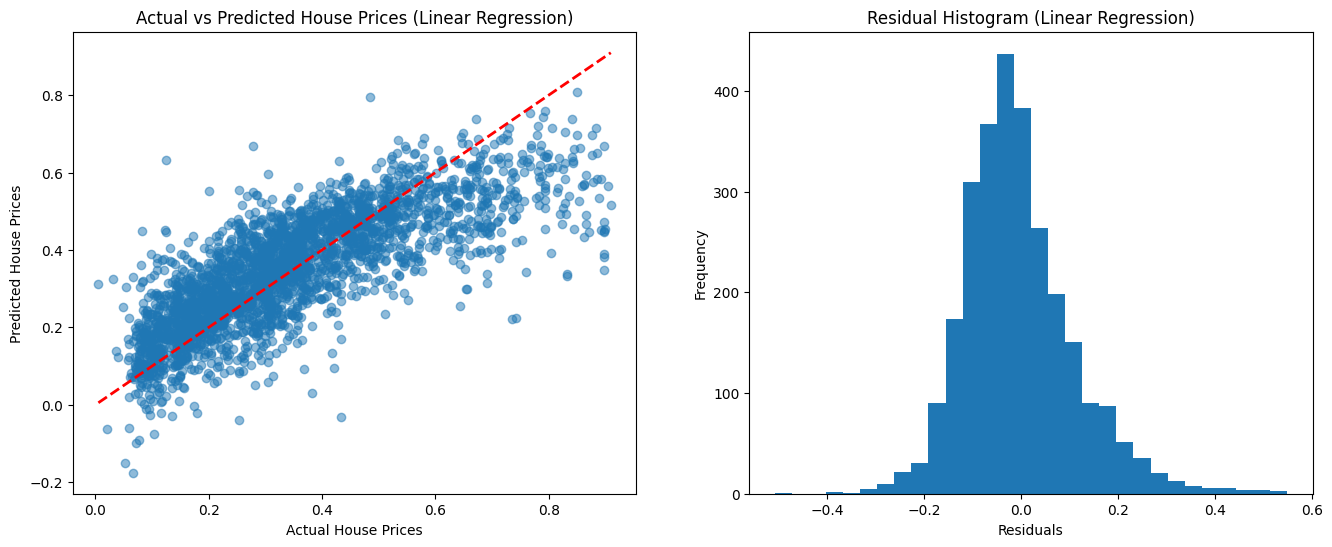

In [329]:
residual_analysis(linear_model, y_test, linear_pred, 'Linear Regression')

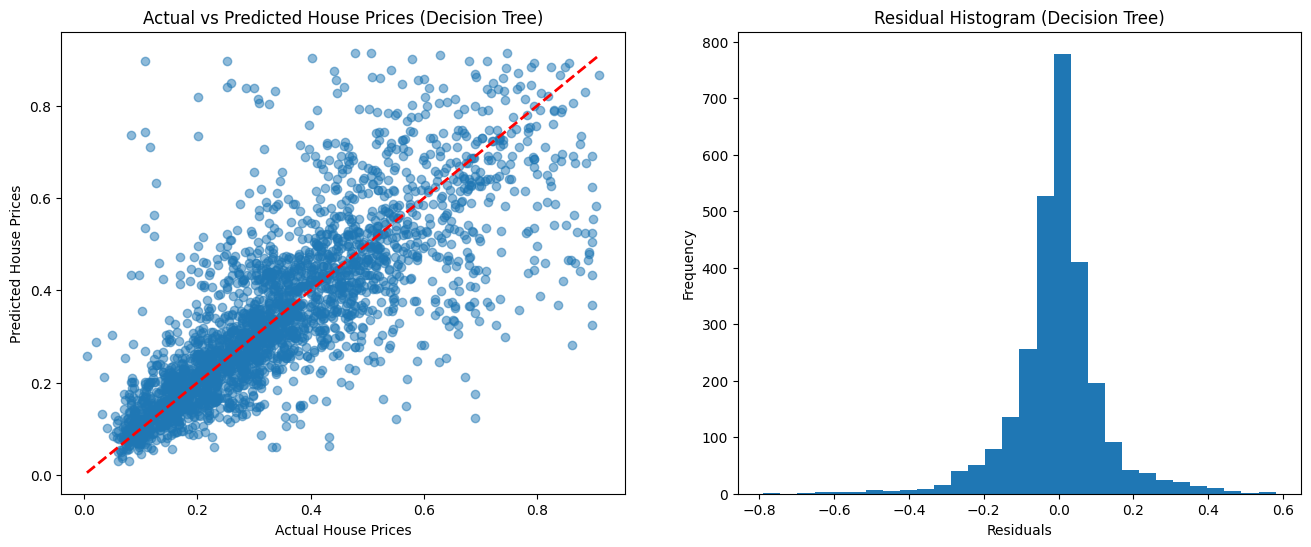

In [330]:
residual_analysis(tree_model, y_test, tree_pred, 'Decision Tree')

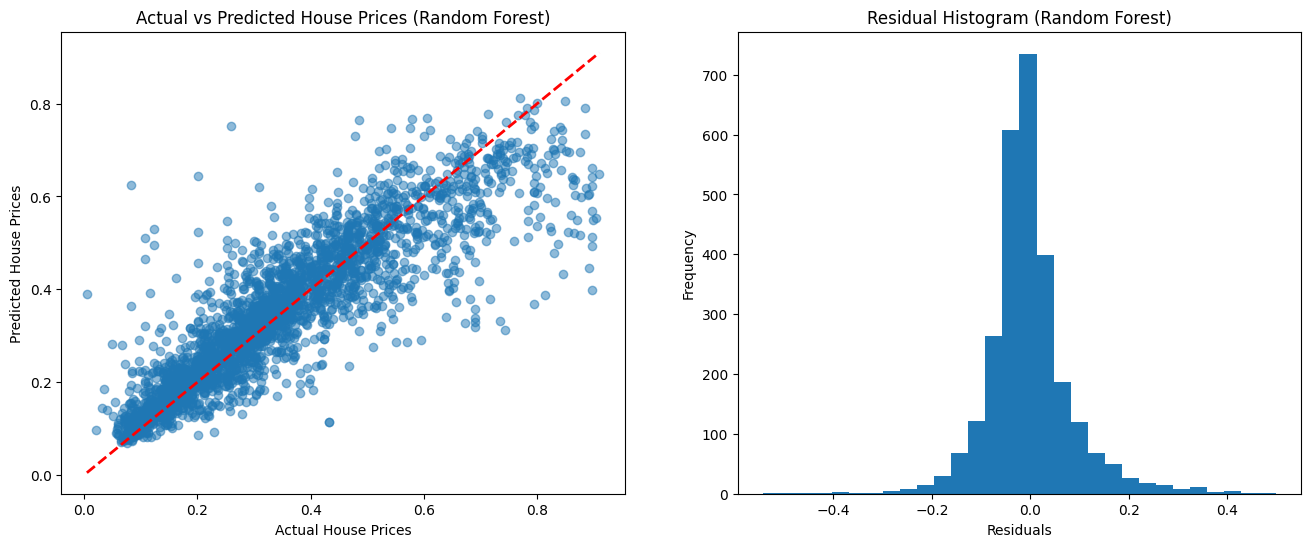

In [331]:
residual_analysis(rf_model, y_test, rf_pred, 'Random Forest')

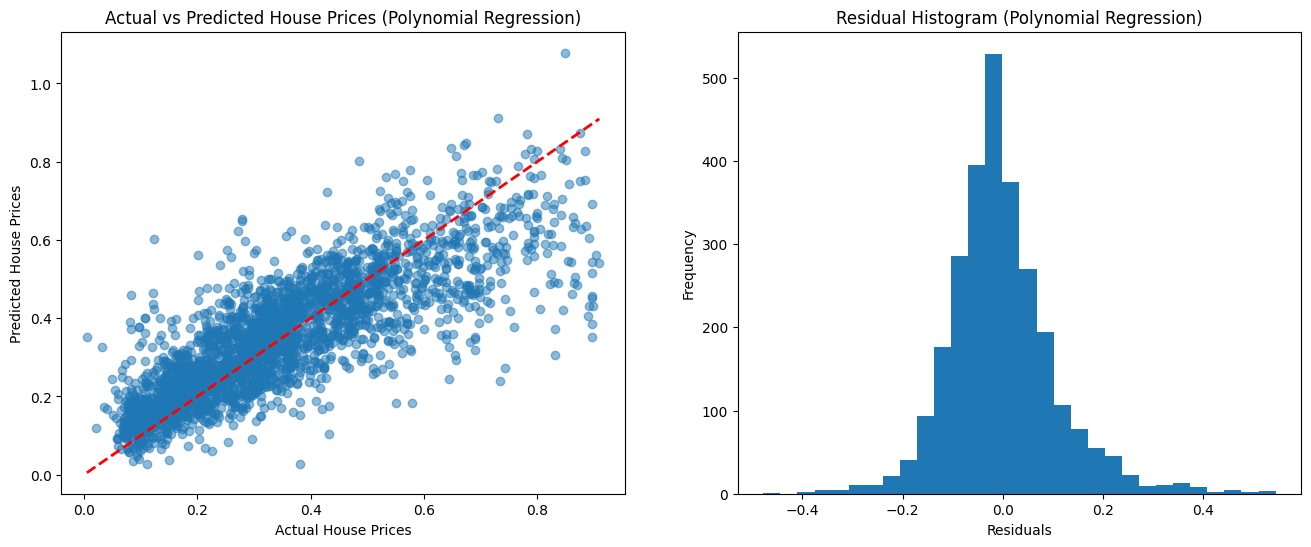

In [332]:
residual_analysis(poly_model, y_test, poly_pred, 'Polynomial Regression')